In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Modelo de regression Logistica

$$\hat{y} = p = \dfrac{1}{1 + \exp{-(\theta_0 + \theta_1 x)}} $$

In [83]:
# El modelo de regression logistica asume que la relacion entre variables esta mediada por la funcion logistica

def y_hat(theta_0, theta_1, x):
    p = 1. / (1. + np.exp(-(theta_0 + theta_1 * x)))
    return(p)


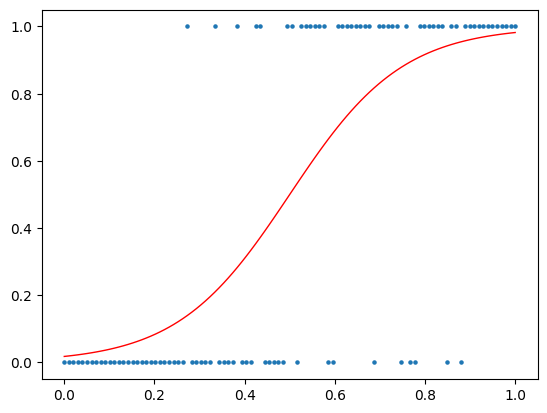

In [3]:
# Simulemos 100 datos para nuestra regression logistica
n = 100

# Definamos los parametros theta_0 "intercepto' y theta_1 "pendiente"
theta_0, theta_1 = [-4, 8]

# Simular los datos x1, y
# Grilla de valores para nuestra covariable
x1 = np.linspace(0, 1, n)

# Esta funcion describe la probabilidad (p) que la observacion x sea 0 o 1.
y = np.random.binomial(1, y_hat(theta_0, theta_1, x1), n)

# Graficamos
plt.scatter(x1, y, s= 5)
plt.plot(x1, y_hat(-4, 8, x1), color='red', linewidth = 1)

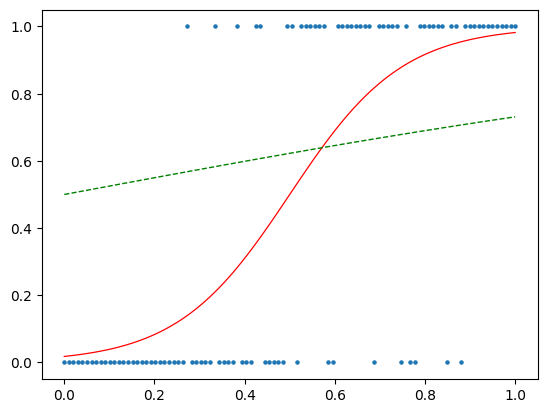

In [4]:
# Ahora vamos a realizar un SGD para estimar los parametros theta.
# Inicializar parametros
t0 = 0
t1 = 1

plt.scatter(x1, y, s= 5)
plt.plot(x1, y_hat(-4, 8, x1), color='red', linewidth = .9)
# La curva en verde es la curva estimada con los parametros inicializados (no aprendidos aun)
plt.plot(x1, y_hat(t0, t1, x1), color= 'green', linewidth= 1, linestyle= '--')

## Loss function

$$ \mathcal{L} = -\dfrac{1}{n} \sum \left(Y \log(\hat{y}) + (1-Y) \log(1 - \hat{y}) \right)$$

In [5]:
# Definimos nuestra Loss function
def loss_fun(Y, X, t0, t1):
    loss = -1/n * np.sum(Y * np.log(y_hat(t0, t1, X)) + (1 - Y) * np.log(1 - y_hat(t0, t1, X)))
    return(loss)

# Obtenemos la cantidad error que cometemos
loss_ini = loss_fun(y, x1, t0, t1)
print("LOSS inicial:", loss_ini)

LOSS inicial: 0.6483582702731107


In [6]:
# Llevamos regsitro del error y los parametros
error = []
error.append(loss_ini)

t0_hat = []
t1_hat = []

t0_hat.append(t0)
t1_hat.append(t1)

## Gradient Descent
$$\nabla_{\theta_0} \mathcal{L} = \sum \hat{y} - y $$

$$\nabla_{\theta_1} \mathcal{L} = \sum (\hat{y} - y) x $$

In [22]:
# Gradient descent
def delta_theta_0(y, x1, t0, t1):
    delta_0 = np.sum((y_hat(t0, t1, x1) - y))
    return(delta_0)

def delta_theta_1(y, x1, t0, t1):
    delta_1 = np.sum((y_hat(t0, t1, x1) - y) * x1)
    return(delta_1)

# Step size o learnig rate
rho = 1 ## aumentamos el rho en 100 veces de que vimos en clase

In [23]:
t0 -= rho * delta_theta_0(y, x1, t0, t1)
t1 -= rho * delta_theta_1(y, x1, t0, t1)

t0_hat.append(t0)
t1_hat.append(t1)

loss = loss_fun(y, x1, t0, t1)
error.append(loss)


print(t0_hat, t1_hat, error, sep='\n')

[0, -0.15006820538605983, -0.2675605245656907, -0.3610325523166664, -0.43707150672843437, -0.5005362896140161, -0.5549327725689172, -0.6027624686248407, -0.6458007121132918, -0.6853047778684893, -0.7221648850296513, -0.7570120782215527, -0.7902946843006956, -0.8223322719660235, -0.8533536540137063, -0.8835236266942545, -0.9129617802188402, -0.9417557346227854, -0.9699704580862026, -0.9976548321955294, -1.0248462818345225, -1.0515740437642134, -1.0778614769816457, -1.1037276980187114, -1.129188740217575, -1.1542583769919774, -1.1789487076457783, -1.2032705752109576, -1.2272338653029458, -1.2508477205918294, -1.2741206953466526, -1.297060867360489, -1.319675919518345, -1.3419731997053153, -1.3639597652312767, -1.385642416163297, -1.407027720691551, -1.4281220347565242, -1.4489315175272586, -1.4694621438665676, -1.4897197145959802, -1.5097098651427745, -1.5294380729870347, -1.5489096642091809, -1.5681298193543987, -1.5871035787702343, -1.605835847530506, -1.6243314000277536, -1.6425948842

/var/folders/nq/g090zvkx5nj_svqzj671lhkr0000gn/T/ipykernel_1394/766567054.py:3: RuntimeWarning: divide by zero encountered in log
  loss = -1/n * np.sum(Y * np.log(y_hat(t0, t1, X)) + (1 - Y) * np.log(1 - y_hat(t0, t1, X)))
/var/folders/nq/g090zvkx5nj_svqzj671lhkr0000gn/T/ipykernel_1394/766567054.py:3: RuntimeWarning: invalid value encountered in multiply
  loss = -1/n * np.sum(Y * np.log(y_hat(t0, t1, X)) + (1 - Y) * np.log(1 - y_hat(t0, t1, X)))


Text(0.5, 1.0, 'Loss en funcion del Epoch')

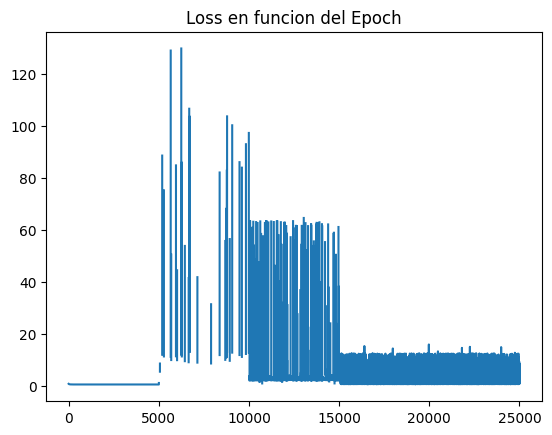

In [27]:
epoch = 5000

for i in range(epoch):
    t0 -= rho * delta_theta_0(y, x1, t0, t1)
    t1 -= rho * delta_theta_1(y, x1, t0, t1)
    
    t0_hat.append(t0)
    t1_hat.append(t1)
    
    loss = loss_fun(y, x1, t0, t1)
    error.append(loss)
plt.plot(error)
plt.title("Loss en funcion del Epoch")

Notamos que la oscilacion es altísima al borde de la inestabilidad

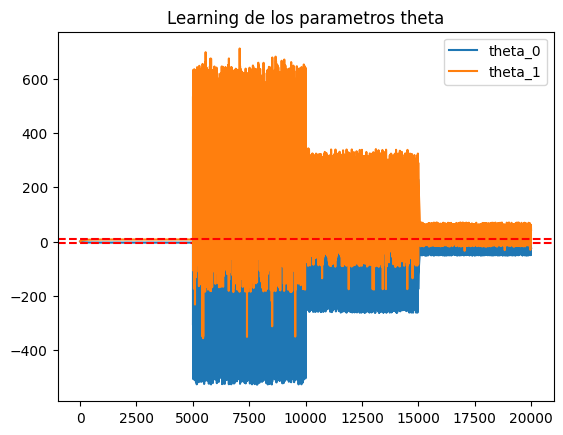

In [25]:
plt.plot(t0_hat, label = 'theta_0')
plt.axhline(y = theta_0, color='red', linestyle='--')

plt.plot(t1_hat, label = 'theta_1')
plt.axhline(y = theta_1, color='red', linestyle='--')

plt.title("Learning de los parametros theta")
plt.legend()

Acá podemos ver la comparación entre ambos thetas, las cuales son casi indistinguibles por el rho alto que tenemos.

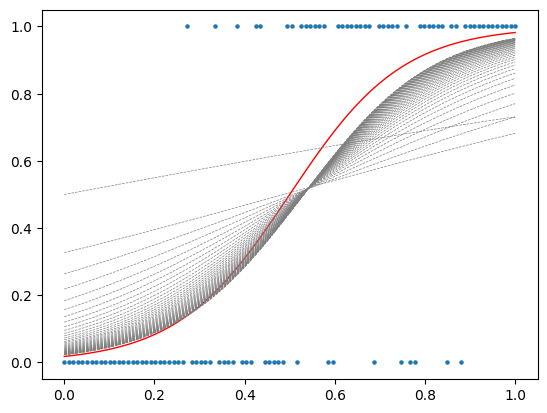

In [30]:
plt.scatter(x1, y, s= 5)
plt.plot(x1, y_hat(-4, 8, x1), color='red', linewidth = 1)

for i in range(50):
    plt.plot(x1, y_hat(t0_hat[10*i], t1_hat[10*i], x1), color= 'gray', linewidth= .5, linestyle= '--')

Notamos en este gráfico que a mayor step size, al final, las curvas grices se parecen más a la roja

Text(0, 0.5, 'theta_1')

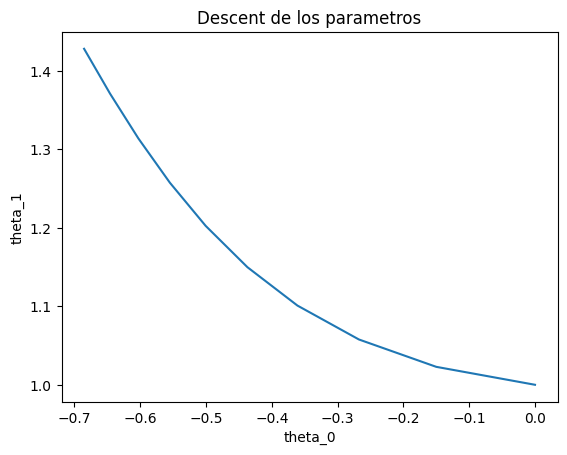

In [32]:
plt.plot(t0_hat[0:10], t1_hat[0:10])

plt.title("Descent de los parametros")
plt.xlabel('theta_0')
plt.ylabel('theta_1')

Ahora utilizamos una función distinta para y


$$ f(x, \theta_0, \theta_1) = y = \dfrac{\theta_0  x}{(\theta_1 + x)} + \epsilon $$



(-5.0, 50.0)

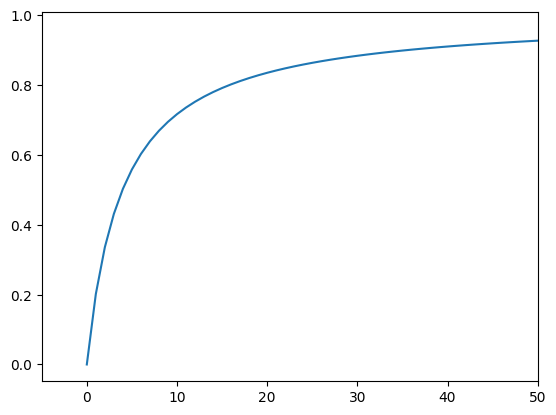

In [85]:
def y_hat(theta_0=1, theta_1=2):
    p = (theta_0*X) / (theta_1 +X)
    return(p)

plt.plot(y_hat(1,2))
plt.xlim(-5,50)

Acá vemos la forma de y_hat

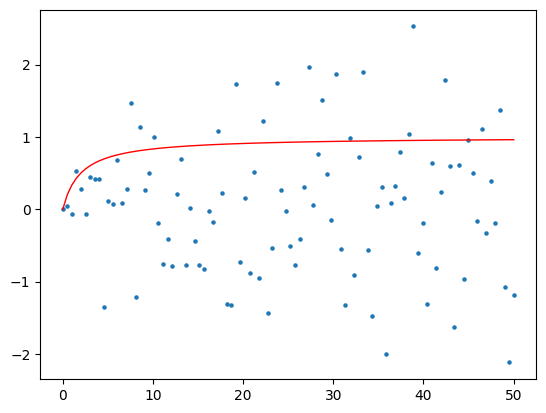

In [107]:
# Simulemos 100 datos para nuestra regression logistica
n = 100

# Definamos los parametros theta_0 "intercepto' y theta_1 "pendiente"
theta_0, theta_1 = [1, 2]

# Simular los datos X, y
# Grilla de valores para nuestra covariable
X = np.linspace(0, 50, n)

# Esta funcion describe la probabilidad (p) que la observacion x sea 0 o 1.
y = np.random.normal(0,y_hat(theta_0=1, theta_1=2), n)

# Graficamos
plt.scatter(X, y, s= 5)
plt.plot(X, y_hat(1, 2), color='red', linewidth = 1)

A priori, la curva roja no está cercana a los puntos

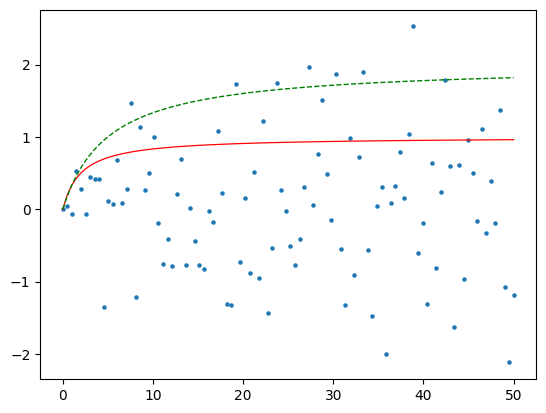

In [108]:
# Ahora vamos a realizar un SGD para estimar los parametros theta.
# Inicializar parametros
t0 = 2
t1 = 5

plt.scatter(X, y, s= 5)
plt.plot(X, y_hat(1, 2), color='red', linewidth = .9)
# La curva en verde es la curva estimada con los parametros inicializados (no aprendidos aun)
plt.plot(X, y_hat(t0, t1), color= 'green', linewidth= 1, linestyle= '--')

Vemos que la curva verde aún no ajusta bien, ya que aún no aprende los parámetros

## Loss function

$$ \mathcal{L} = \left(Y - \dfrac{\theta_0  x}{(\theta_1 + x)}\right)^T\left(Y - \dfrac{\theta_0  x}{(\theta_1 + x)}\right)$$

In [109]:
# Definimos nuestra Loss function
def loss_fun(Y, X, t0, t1):
    loss = (Y-y_hat(t0,t1))*(Y-y_hat(t0,t1))
    return(loss)


# Obtenemos la cantidad error que cometemos
loss_ini = loss_fun(y, X, t0, t1)
print("LOSS inicial:", loss_ini)

LOSS inicial: [0.00000000e+00 1.96673085e-02 1.63588719e-01 3.58147573e-03
 8.85298766e-02 5.35388420e-01 9.34271228e-02 1.69174040e-01
 2.22013509e-01 5.30828683e+00 8.02538403e-01 9.56272216e-01
 1.74746710e-01 1.10579407e+00 7.92267308e-01 7.16989240e-02
 6.01799080e+00 1.53431419e-02 1.04054676e+00 6.63788243e-01
 1.11938095e-01 2.40085422e+00 4.56664253e+00 3.28677065e+00
 4.85945525e+00 1.50523602e+00 5.58947051e-01 4.97727049e+00
 2.12768105e+00 3.72215942e+00 5.19779478e+00 5.48627920e+00
 2.41404511e+00 2.94570195e+00 2.17263617e-01 1.76571976e+00
 8.30855692e+00 8.45201499e+00 2.01698606e-02 5.42685315e+00
 2.09620369e+00 6.17555773e+00 1.20585574e+00 6.62146073e+00
 1.68235874e-01 9.46163706e+00 4.74468893e+00 9.44688474e-03
 1.93575310e+00 2.84545190e+00 4.76453733e+00 5.94943098e+00
 4.35428915e+00 1.88718024e+00 7.87821977e-02 2.66271386e+00
 8.69794238e-01 3.90232280e-02 1.49383720e+00 3.48810968e+00
 2.27068146e-02 5.12205481e+00 9.30582414e+00 5.58655541e-01
 6.9986874

In [110]:
# Llevamos regsitro del error y los parametros
error = []
error.append(loss_ini)

t0_hat = []
t1_hat = []

t0_hat.append(t0)
t1_hat.append(t1)

## Gradient Descent
$$\nabla_{\theta_0} \mathcal{L} = (-2Y+1)\left( \dfrac{x}{(\theta_1 + x)} \right) $$

$$\nabla_{\theta_1} \mathcal{L} =(2Y-1)(\theta_1+x)^{-2}(\theta_0 x) $$

In [111]:
# Gradient descent
def delta_theta_0(y, X, t0, t1):
    delta_0 = ((-2*y)+1)*(X/(t1+X))
    return(delta_0)

def delta_theta_1(y, X, t0, t1):
    delta_1 = ((2*y)-1)*((t1+X)**(-2))*(t0*X)
    return(delta_1)

# Step size o learnig rate
rho = .01

In [112]:
t0 -= rho * delta_theta_0(y, X, t0, t1)
t1 -= rho * delta_theta_1(y, X, t0, t1)

t0_hat.append(t0)
t1_hat.append(t1)

loss = loss_fun(y, X, t0, t1)
error.append(loss)


print(t0_hat, t1_hat, error, sep='\n')


[2, array([2.        , 1.99916192, 1.99808966, 2.0001161 , 1.9987223 ,
       1.99623784, 1.99961554, 1.99931321, 1.9993088 , 1.9823658 ,
       1.99607216, 1.99552358, 2.00194919, 1.99527463, 1.99743963,
       2.0117179 , 1.97877822, 2.00809014, 1.99703549, 2.00000193,
       2.00673206, 1.99061802, 1.98265296, 1.98720992, 1.98175592,
       1.99578487, 2.00290911, 1.98145027, 1.99289162, 1.98601011,
       1.98081041, 1.97989338, 1.99196146, 1.98957164, 2.00902835,
       1.99579402, 1.97154778, 1.97113511, 2.01949439, 1.98030909,
       1.99447502, 1.97786379, 2.00032989, 1.97646768, 2.01179571,
       1.96825192, 1.98300823, 2.02063731, 1.99613211, 1.99129797,
       1.98308292, 1.97882506, 1.98476855, 1.99682283, 2.02485897,
       1.99259547, 2.00453638, 2.017151  , 1.9997637 , 1.98878193,
       2.02347512, 1.982062  , 1.96850974, 2.00831293, 1.97551835,
       2.00388174, 2.02422273, 1.98146533, 1.96546581, 1.99200857,
       1.99658256, 1.95605392, 1.99281136, 1.9968994 , 2.0

Text(0.5, 1.0, 'Loss en funcion del Epoch')

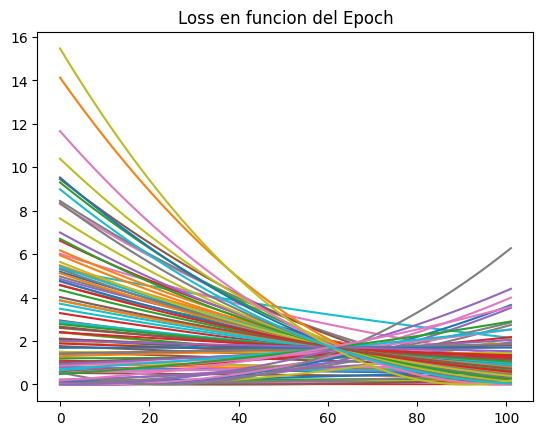

In [113]:
epoch = 100

for i in range(epoch):
    t0 -= rho * delta_theta_0(y, X, t0, t1)
    t1 -= rho * delta_theta_1(y, X, t0, t1)
    
    t0_hat.append(t0)
    t1_hat.append(t1)
    
    loss = loss_fun(y, X, t0, t1)
    error.append(loss)
plt.plot(error)
plt.title("Loss en funcion del Epoch")

Se sospecha algún problema en el tamaño ya que este gráfico no es claro

In [ ]:
# plt.plot(t0_hat, label = 'theta_0')
# plt.axhline(y = theta_0, color='red', linestyle='--')

# plt.plot(t1_hat, label = 'theta_1')
# plt.axhline(y = theta_1, color='red', linestyle='--')

# plt.title("Learning de los parametros theta")
# plt.legend() 

nos arroja un error de size limit

IndexError: list index out of range

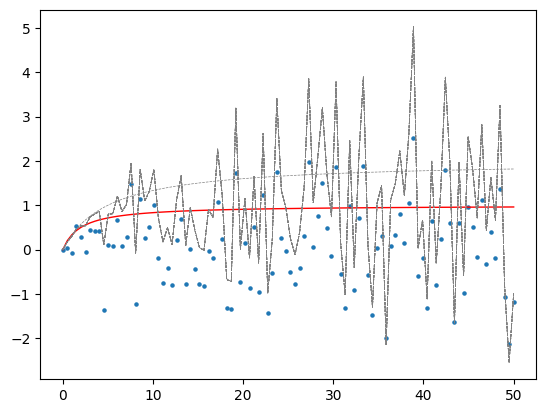

In [115]:
plt.scatter(X, y, s= 5)
plt.plot(X, y_hat(1, 2), color='red', linewidth = 1)

for i in range(50):
    plt.plot(X, y_hat(t0_hat[10*i], t1_hat[10*i]), color= 'gray', linewidth= .5, linestyle= '--')

se observa mucha "inestabilidad" en el ajuste, tiene muchos puntos donde la función no es lo suficientemente regular para poder ser derivada.

In [ ]:
# plt.plot(t0_hat[0:6], t1_hat[0:6])

# plt.title("Descent de los parametros")
# plt.xlabel('theta_0')
# plt.ylabel('theta_1')

mismo problema del size limit